# APPM 5370 Homework 5

## Soroush Khadem

In [1]:
import numpy as np
from scipy.integrate import odeint
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')
import math

In [2]:
horiz_scaling = 3 # scale plots to fill page, so must adjust the phase plane plots as well
height = 5

plt.rcParams['figure.figsize'] = [height*horiz_scaling, height]

### Problem 5: Testing BCM Rule Predictions

#### Part A

$$ w_1' = \eta v(v-v_\theta)u_1 $$
$$ w_2' = \eta v(v-v_\theta)u_2 $$
$$ v = w_1u_1 + w_2u_2$$

In [3]:
n = 1
v_theta = 2

In [4]:
def F(Y, t):
    w1, w2 = Y
    u1, u2 = pattern_1(t)
    v = w1*u1 + w2*u2
    w1 = n*v*(v-v_theta)*u1
    w2 = n*v*(v-v_theta)*u2
    return [w1, w2]
    

In [5]:
def pattern_1(dt):
    if (math.floor(dt)%2 == 0):
        return 3, 0
    else:
        return 0, 1

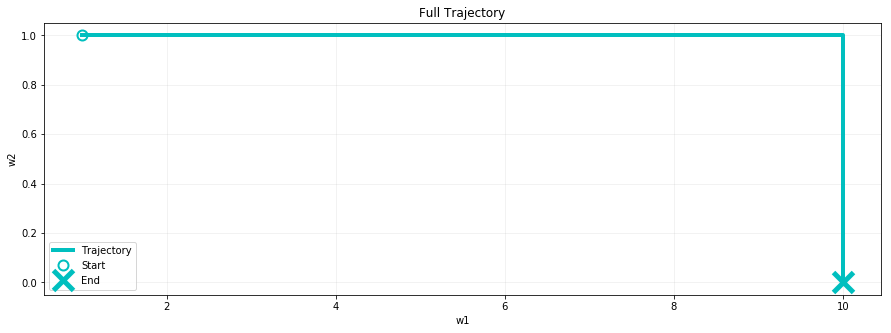

In [6]:
tvec = np.linspace(0, 10, 100)
W = np.zeros((len(tvec) + 1, 2))
W[0] = [1,1] # initial

for j, dt in enumerate(tvec):
    w1_p, w2_p = F(W[j], dt)
    w1 = W[j][0] + w1_p
    w2 = W[j][1] + w2_p
    w1 = min(w1, 10)
    w2 = min(w2, 10)
    W[j+1] = [w1,w2]


fig = plt.figure()
plt.plot(W[:,0],W[:,1],'c-', linewidth=4) # trajectory
plt.plot(W[:,0][0],W[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
plt.plot(W[:,0][-1],W[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

legend_text = ['Trajectory', 'Start', 'End']

plt.grid(True, alpha=0.2)
plt.title('Full Trajectory')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend(legend_text)

The weights immediatley saturate to the max value for $w_1$, where the input firing rate of 3Hz was high enough to go above the threshold and strengthen the connection. For $w_2$, the input decreased the weight to 0 on the first presentation of $\mu = 2$

#### Part B

$$ w_1' = \eta v(v-v_\theta)u_1 $$
$$ w_2' = \eta v(v-v_\theta)u_2 $$
$$ v = w_1u_1 + w_2u_2$$

In [7]:
n = 1
v_theta = 2

In [8]:
def G(Y, t):
    w1, w2 = Y
    u1, u2 = pattern_2(t)
    v = w1*u1 + w2*u2
    w1 = n*v*(v-v_theta)*u1
    w2 = n*v*(v-v_theta)*u2
    return [w1, w2]
    

In [9]:
def pattern_2(dt):
    if (math.floor(dt)%2 == 0):
        return 3, 0
    else:
        return 0, 2.5

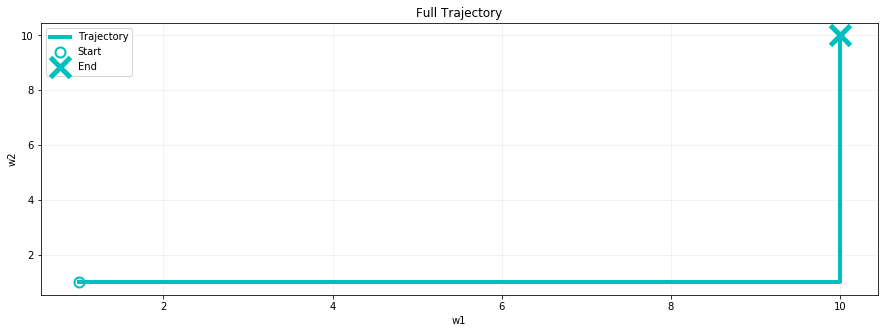

In [10]:
tvec = np.linspace(0, 10, 100)
W = np.zeros((len(tvec) + 1, 2))
W[0] = [1,1] # initial

for j, dt in enumerate(tvec):
    w1_p, w2_p = G(W[j], dt)
    w1 = W[j][0] + w1_p
    w2 = W[j][1] + w2_p
    w1 = min(w1, 10)
    w2 = min(w2, 10)
    W[j+1] = [w1,w2]


fig = plt.figure()
plt.plot(W[:,0],W[:,1],'c-', linewidth=4) # trajectory
plt.plot(W[:,0][0],W[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
plt.plot(W[:,0][-1],W[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

legend_text = ['Trajectory', 'Start', 'End']

plt.grid(True, alpha=0.2)
plt.title('Full Trajectory')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend(legend_text)

The weights saturate to the max value for both $w_1$ and $w_2$, since the input firing rate of 3Hz and 2.5Hz are high enough to go above the threshold and strengthen the connections.

#### Part C

$$ w_1' = \eta v(v-v_\theta)u_1 $$
$$ w_2' = \eta v(v-v_\theta)u_2 $$
$$ v = w_1u_1 + w_2u_2$$
$$ v_\theta' = v^2 - v_\theta$$

In [11]:
n = 1

In [12]:
def H(Y, t):
    w1, v_theta = Y
    v = w1*u1
    w1 = n*v*(v-v_theta)*u1
    v_theta = v**2 - v_theta
    return [w1, v_theta]
    

#### Case 1: Stable Node ($u_1 < \sqrt{3 - 2\sqrt2}$)

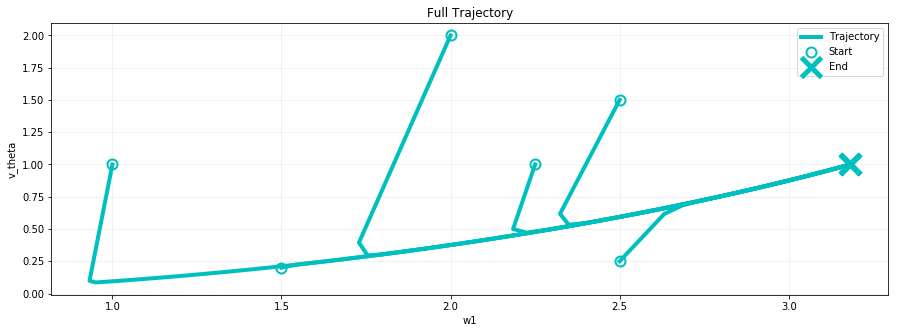

In [13]:
u1 = math.sqrt(3 - 2*math.sqrt(2)) - 0.1
tvec = np.linspace(0, 100, 100)
inital_vals = [[1,1], [2,2], [1.5,.2], [2.5,0.25], [2.5,1.5], [2.25,1]]
fig = plt.figure()

for initial_val in inital_vals:
    W = np.zeros((len(tvec) + 1, 2))
    W[0] = initial_val
    for j, dt in enumerate(tvec):
        w1_p, v_theta_p = H(W[j], dt)
        w1 = W[j][0] + w1_p
        v_theta = W[j][1] + v_theta_p
        w1 = min(w1, 10)
        v_theta = min(v_theta, 10)
        W[j+1] = [w1,v_theta]

    plt.plot(W[:,0],W[:,1],'c-', linewidth=4) # trajectory
    plt.plot(W[:,0][0],W[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
    plt.plot(W[:,0][-1],W[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

legend_text = ['Trajectory', 'Start', 'End']

plt.grid(True, alpha=0.2)
plt.title('Full Trajectory')
plt.xlabel('w1')
plt.ylabel('v_theta')
plt.legend(legend_text)

In [14]:
W[-1]

array([3.18254381, 0.9999964 ])

In [15]:
1/u1

3.182548813130502

The trajectories settle at the predicted value of $(\frac{1}{u_1}, 1)$, and it is clear there is a stable node

#### Case 2: Stable Spiral ($\sqrt{3 - 2\sqrt2} < u_1 < 1$)

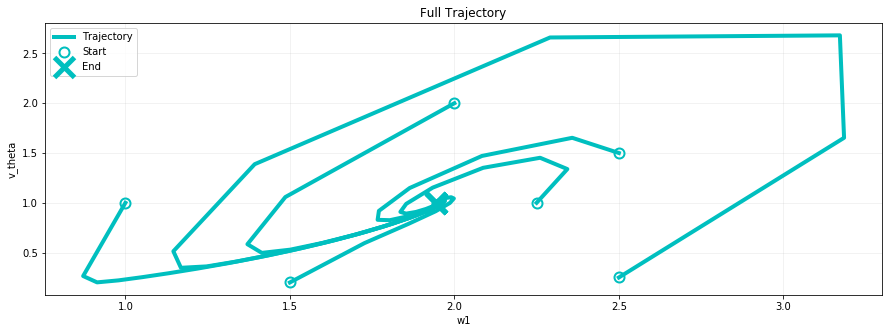

In [16]:
u1 = math.sqrt(3 - 2*math.sqrt(2)) + 0.1
tvec = np.linspace(0, 100, 100)
inital_vals = [[1,1], [2,2], [1.5,.2], [2.5,0.25], [2.5,1.5], [2.25,1]]
fig = plt.figure()

for initial_val in inital_vals:
    W = np.zeros((len(tvec) + 1, 2))
    W[0] = initial_val
    for j, dt in enumerate(tvec):
        w1_p, v_theta_p = H(W[j], dt)
        w1 = W[j][0] + w1_p
        v_theta = W[j][1] + v_theta_p
        w1 = min(w1, 10)
        v_theta = min(v_theta, 10)
        W[j+1] = [w1,v_theta]

    plt.plot(W[:,0],W[:,1],'c-', linewidth=4) # trajectory
    plt.plot(W[:,0][0],W[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
    plt.plot(W[:,0][-1],W[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

legend_text = ['Trajectory', 'Start', 'End']

plt.grid(True, alpha=0.2)
plt.title('Full Trajectory')
plt.xlabel('w1')
plt.ylabel('v_theta')
plt.legend(legend_text)

In [17]:
W[-1]

array([1.94471728, 1.        ])

In [18]:
1/u1

1.9447172793051228

The trajectories settle at the predicted value of $(\frac{1}{u_1}, 1)$, and it is clear there is a stable spiral

#### Case 3: Unstable ($u_1 > \sqrt{3 + 2\sqrt2}$)

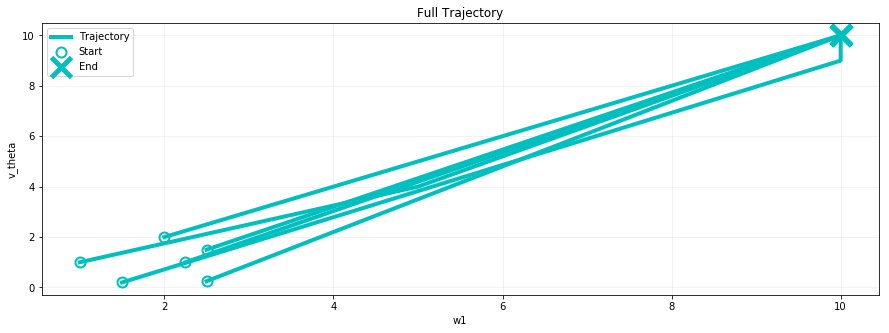

In [19]:
u1 = 2
tvec = np.linspace(0, 100, 100)
inital_vals = [[1,1], [2,2], [1.5,.2], [2.5,0.25], [2.5,1.5], [2.25,1]]
fig = plt.figure()

for initial_val in inital_vals:
    W = np.zeros((len(tvec) + 1, 2))
    W[0] = initial_val
    for j, dt in enumerate(tvec):
        w1_p, v_theta_p = H(W[j], dt)
        w1 = W[j][0] + w1_p
        v_theta = W[j][1] + v_theta_p
        w1 = min(w1, 10)
        v_theta = min(v_theta, 10)
        W[j+1] = [w1,v_theta]

    plt.plot(W[:,0],W[:,1],'c-', linewidth=4) # trajectory
    plt.plot(W[:,0][0],W[:,1][0],'co', fillstyle='none', markersize=10, mew=2) # trajectory start
    plt.plot(W[:,0][-1],W[:,1][-1],'cx', markersize=20, mew=5) # trajectory end

legend_text = ['Trajectory', 'Start', 'End']

plt.grid(True, alpha=0.2)
plt.title('Full Trajectory')
plt.xlabel('w1')
plt.ylabel('v_theta')
plt.legend(legend_text)

In [20]:
W[-1]

array([10., 10.])

Here, the output saturates to the max value, and there is no oscillations.